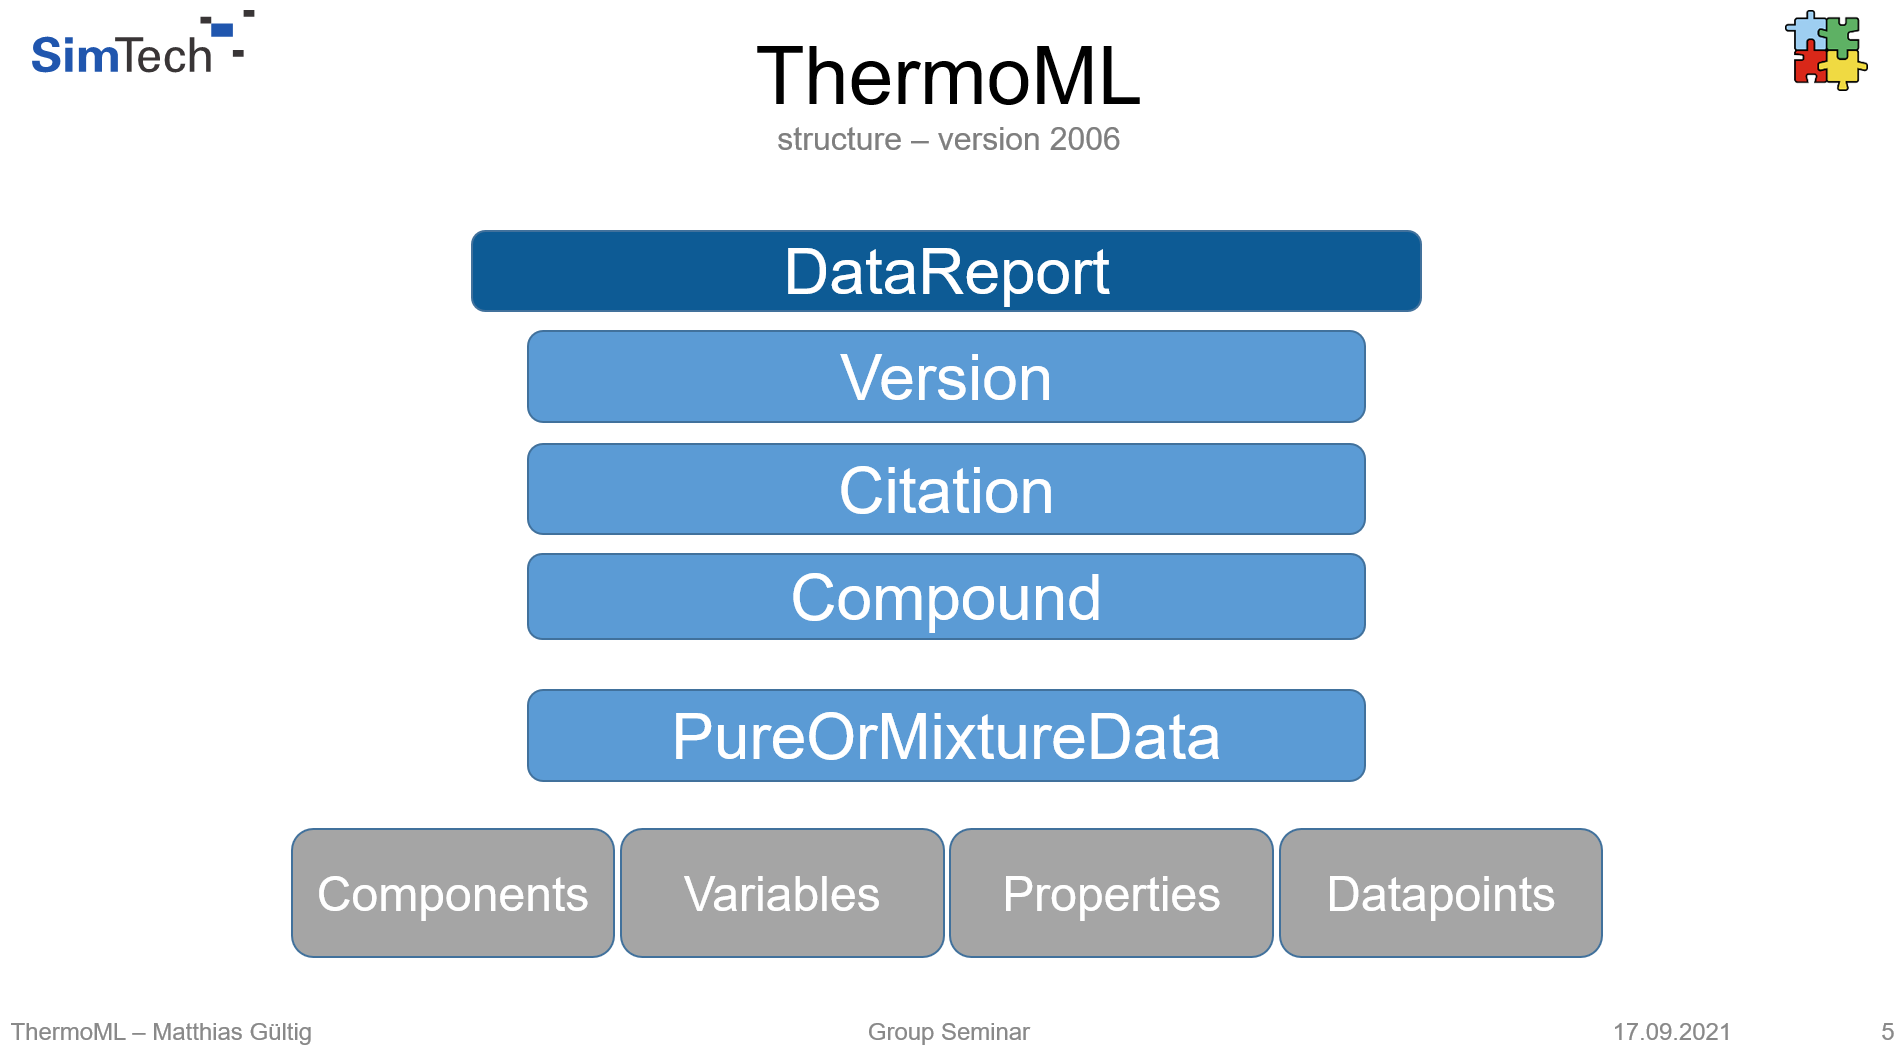

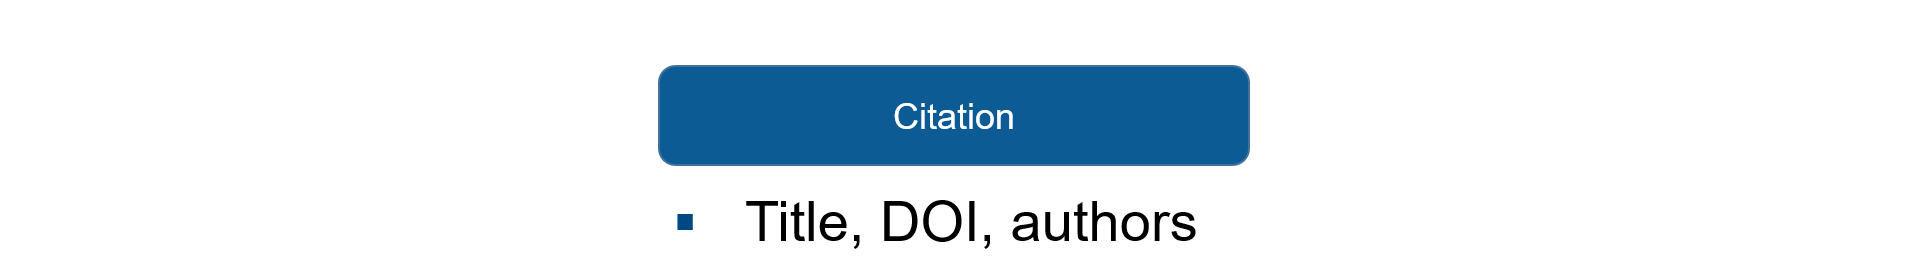

In [22]:
from pythermo.thermoml.core import DataReport 

dataReport = DataReport("Title of the data report", "Thats our DOI", "author 1", "author 2")

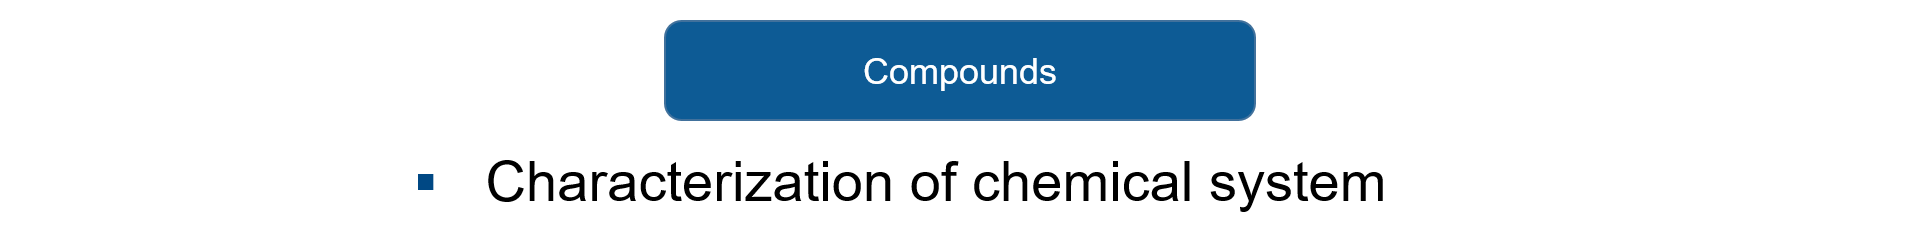

In [30]:
from pythermo.thermoml.core import Compound

comp1 = Compound(ID="id1", standardInchI = "standard inhchi", standardInchIKey = "key", commonName="water")
comp2 = Compound(ID="id2", smiles = "smiles Code", commonName="ethanol")

comp1_ID = dataReport.addCompound(comp1)
comp2_ID = dataReport.addCompound(comp2)

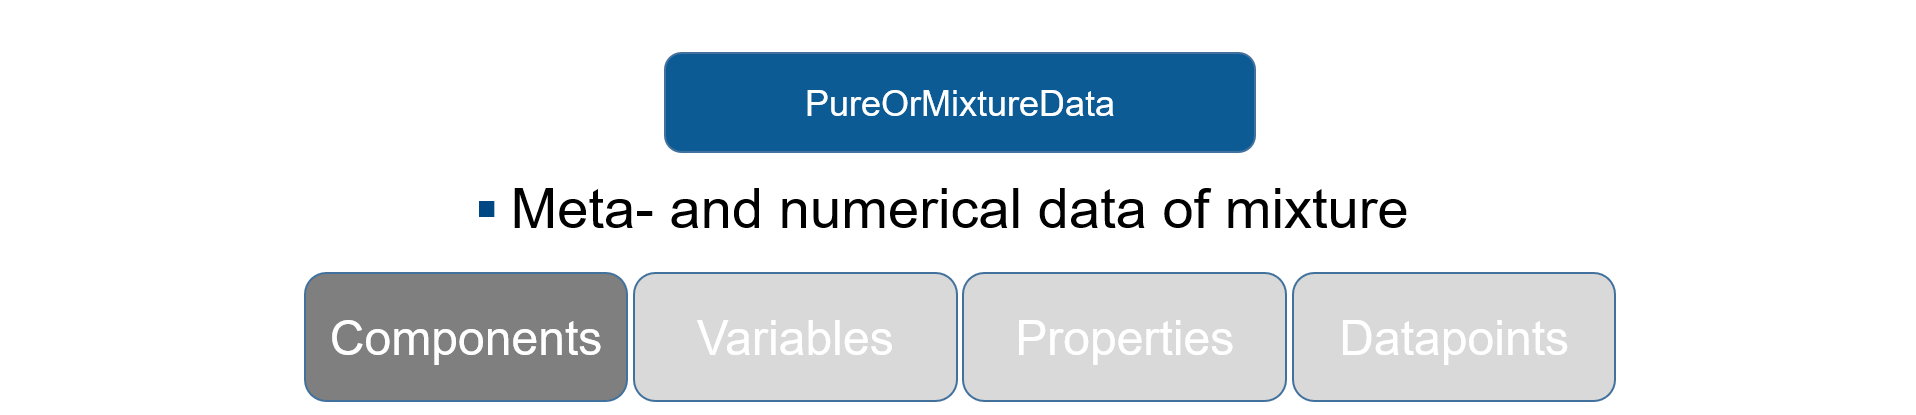

In [33]:
from pythermo.thermoml.core import PureOrMixtureData

experiment = PureOrMixtureData("experiment1", comp1_ID, comp2_ID)

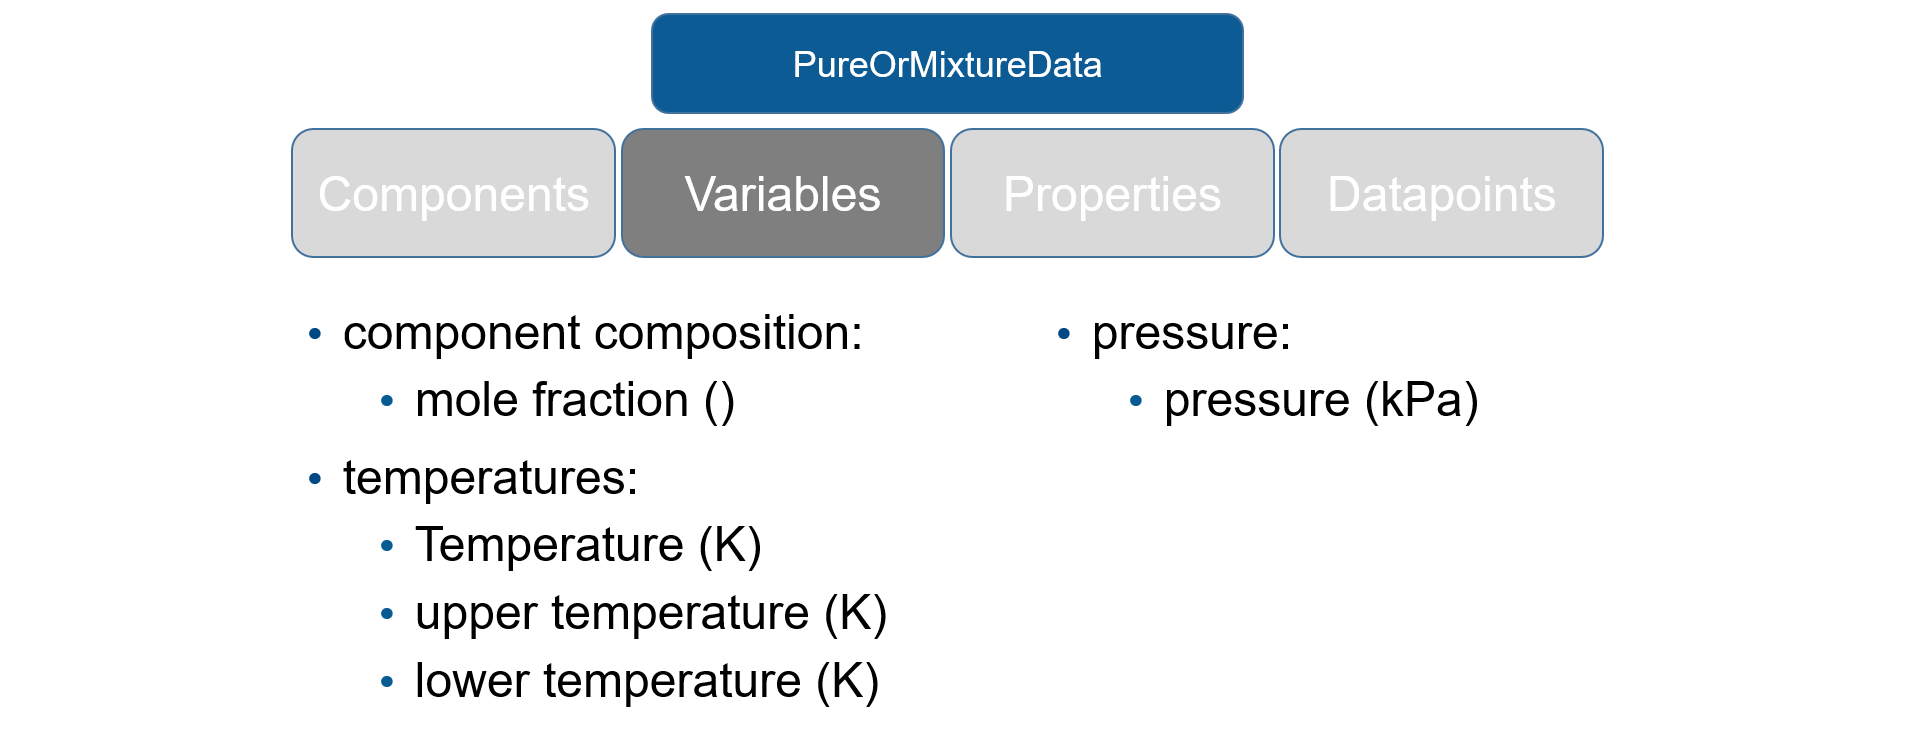

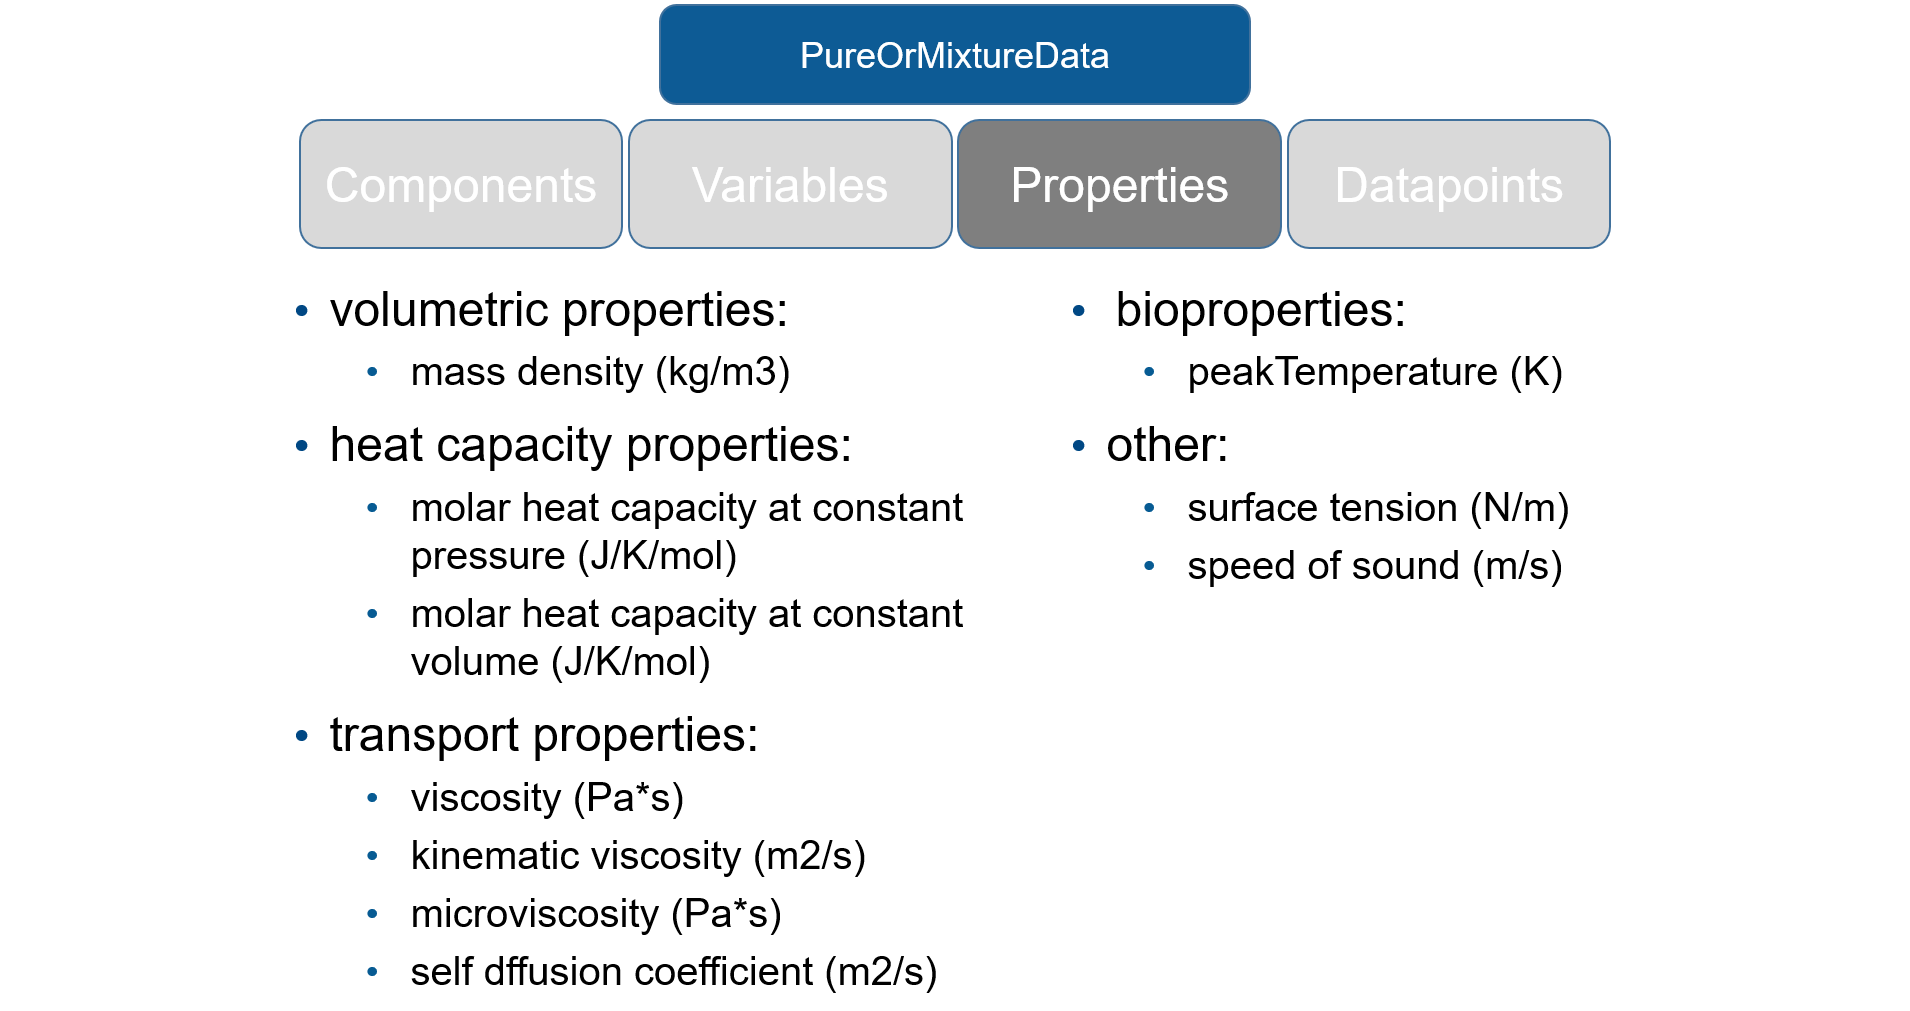

In [32]:
from pythermo.thermoml.props.transportproperties import Viscosity
from pythermo.thermoml.vars.componentcomposition import MoleFraction
from pythermo.thermoml.vars.temperature import Temperature


# property definitions
visc = Viscosity(ID='visc1', method="simulation")

# variable definitions
temp = Temperature(ID='temp1')
frac1 = MoleFraction(ID='moleFrac1', compoundID=comp1_ID)
frac2 = MoleFraction(ID='moleFrac2', compoundID=comp2_ID)

In [35]:
viscID = experiment.addProperty(prop=visc)

tempID = experiment.addVariable(variable=temp)
frac1ID = experiment.addVariable(variable=frac1)
frac2ID = experiment.addVariable(variable=frac2)

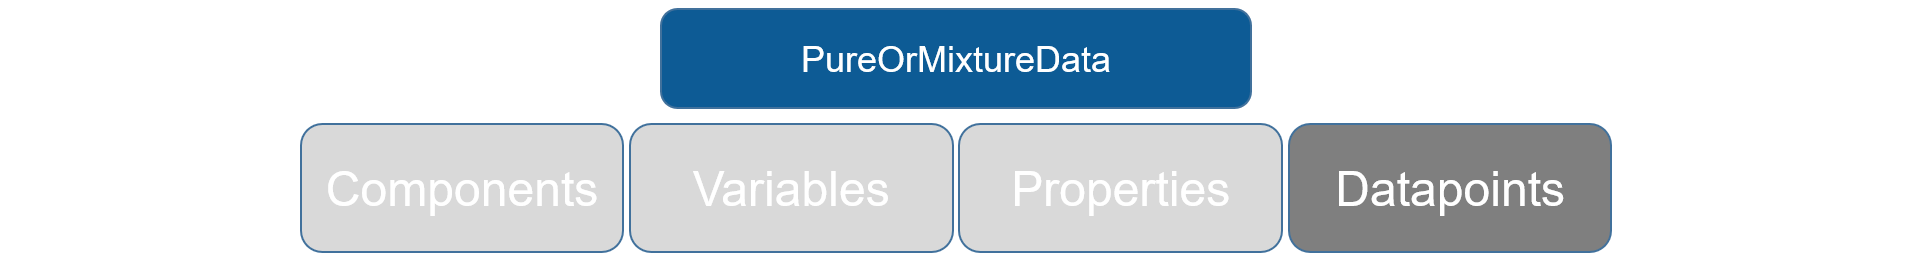

In [37]:
measurementID = "meas1"

viscDataPoint = DataPoint(measurementID=measurementID, value=0.001, propID=viscID, uncertainty=0.0001)

In [38]:
tempDataPoint = DataPoint(measurementID=measurementID, value=300.0, varID=tempID, uncertainty=10.0)
frac1DataPoint = DataPoint(measurementID=measurementID, value=0.5, varID=frac1ID, uncertainty=0.01)
frac2DataPoint = DataPoint(measurementID=measurementID, value=0.5, varID=frac2ID, uncertainty=0.02)

datapoints = [viscDataPoint, tempDataPoint, frac1DataPoint, frac2DataPoint]

In [39]:
# add Measurement to experiment
experiment.addMeasurement(dataPoints=datapoints)

# add experiment to dataReport
dataReport.addPureOrMixtureData(experiment)

'experiment1'

In [43]:
from pythermo.thermoml.tools.readTools import readThermo
from pythermo.thermoml.tools.writeTools import writeThermo

writeThermo(dataReport, "testThermo")
print(dataRep)

{
    "_title": "Title of referred Paper",
    "_DOI": "84821",
    "_authors": {
        "_author0": "author 1",
        "_author1": "author 2"
    },
    "compounds": {
        "id1": {
            "_standardInchI": "",
            "_standardInchIKey": "",
            "_smiles": "smiles1",
            "_commonName": "water",
            "_Compound__type": "comp",
            "_ID": "id1"
        },
        "id2": {
            "_standardInchI": "",
            "_standardInchIKey": "",
            "_smiles": "",
            "_commonName": "ethanol",
            "_Compound__type": "comp",
            "_ID": "id2"
        }
    },
    "pureOrMixtureData": {
        "experiement1": {
            "_ID": "experiement1",
            "comps": [
                "id1",
                "id2"
            ],
            "_properties": {
                "visc1": {
                    "_propName": "Viscosity",
                    "_ID": "visc1",
                    "_propGroup": "TransportProp",
  

In [44]:
dataRep = readThermo("testThermo.xml")
print(dataRep)

{
    "_title": "Title of the data report",
    "_DOI": "Thats our DOI",
    "_authors": {
        "_author0": "author 1",
        "_author1": "author 2"
    },
    "compounds": {
        "id1": {
            "_standardInchI": "",
            "_standardInchIKey": "",
            "_smiles": "",
            "_commonName": "water",
            "_Compound__type": "comp",
            "_ID": "id1"
        },
        "id2": {
            "_standardInchI": "",
            "_standardInchIKey": "",
            "_smiles": "smiles Code",
            "_commonName": "ethanol",
            "_Compound__type": "comp",
            "_ID": "id2"
        }
    },
    "pureOrMixtureData": {
        "experiment1": {
            "_ID": "experiment1",
            "comps": [
                "id1",
                "id2"
            ],
            "_properties": {
                "visc1": {
                    "_propName": "Viscosity",
                    "_ID": "visc1",
                    "_propGroup": "Transpo